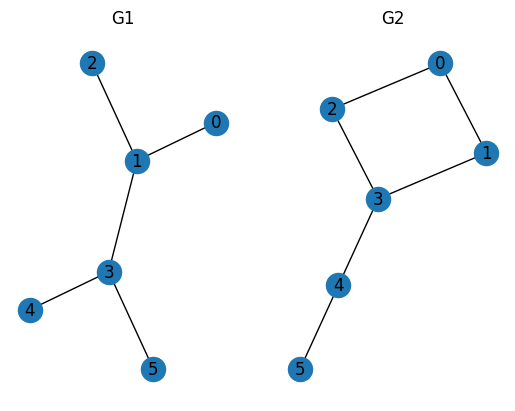

measures(G1) = [1.67, 3.67, 0.89, 0.0, 1.93, -0.67]
measures(G2) = [2.0, 4.33, 0.33, 0.0, 1.93, -0.09]


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

A1 = np.array([
#    0 1 2 3 4 5
    [0,1,0,0,0,0], # 0
    [1,0,1,1,0,0], # 1
    [0,1,0,0,0,0], # 2
    [0,1,0,0,1,1], # 3
    [0,0,0,1,0,0], # 4
    [0,0,0,1,0,0]  # 5
    ]) 
G1 = nx.from_numpy_array(np.array(A1), create_using=nx.Graph)  

A2 = np.array([
#    0 1 2 3 4 5
    [0,1,1,0,0,0], # 0
    [1,0,0,1,0,0], # 1
    [1,0,0,1,0,0], # 2
    [0,1,1,0,1,0], # 3
    [0,0,0,1,0,1], # 4
    [0,0,0,0,1,0]  # 5
    ]) 
G2 = nx.from_numpy_array(np.array(A2), create_using=nx.Graph)  

plt.subplot(1,2,1)
plt.title("G1")
nx.draw_kamada_kawai(G1,with_labels=True)
plt.subplot(1,2,2)
plt.title("G2")
nx.draw_kamada_kawai(G2,with_labels=True)
plt.show()

def measures(G):
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    return  k1, k2, variance, av_cl, l, r

results_G1 = measures(G1)
results_G2 = measures(G2)

print(f"measures(G1) = {[round(result, 2) for result in results_G1]}")
print(f"measures(G2) = {[round(result, 2) for result in results_G2]}")

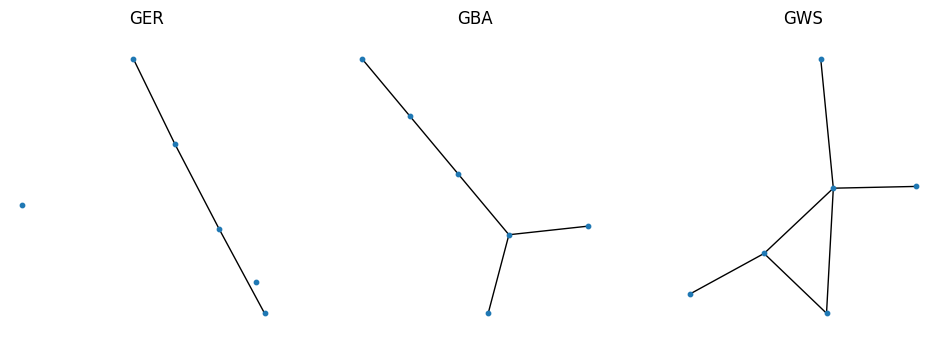

Betti numbers(GER) =  [3, 0]
Betti numbers(GBA) =  [1, 0]
Betti numbers(GWS) =  [1, 0, 0]
measures(GER) = [1.5, 2.5, 0.25, 0.0, 1.67, -0.5]
measures(GBA) = [1.67, 3.33, 0.56, 0.0, 2.13, -0.67]
measures(GWS) = [2.0, 5.33, 1.33, 0.25, 1.73, -0.68]


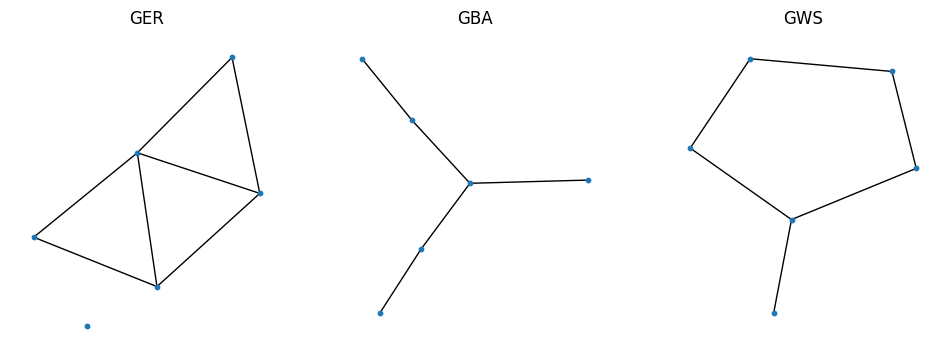

Betti numbers(GER) =  [2, 0, 0]
Betti numbers(GBA) =  [1, 0]
Betti numbers(GWS) =  [1, 1]
measures(GER) = [2.8, 8.4, 0.56, 0.77, 1.3, -0.5]
measures(GBA) = [1.67, 3.33, 0.56, 0.0, 2.07, -0.33]
measures(GWS) = [2.0, 4.33, 0.33, 0.0, 1.73, -0.64]


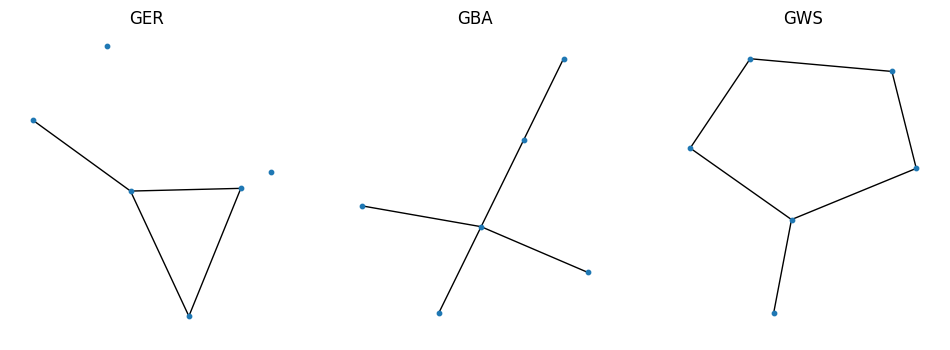

Betti numbers(GER) =  [3, 0, 0]
Betti numbers(GBA) =  [1, 0]
Betti numbers(GWS) =  [1, 1]
measures(GER) = [2.0, 4.5, 0.5, 0.58, 1.33, -0.71]
measures(GBA) = [1.67, 4.0, 1.22, 0.0, 1.87, -0.74]
measures(GWS) = [2.0, 4.33, 0.33, 0.0, 1.73, -0.64]


In [50]:
import networkx as nx
import gudhi

# Parâmetros dados
n_nodes = 6
av_degree = 2

# Parâmetros calculados
p = av_degree/(n_nodes-1)
m = int(av_degree/2)
k = int(av_degree)

def m_component(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    return G.subgraph(Gcc[0])


for i in range(0,3):
    # Erdos-Reni
    GER = nx.erdos_renyi_graph(n_nodes, p, seed=None, directed=False)
    # Barabasi-Albert
    GBA = nx.barabasi_albert_graph(n_nodes, m, seed=None)
    # Small-world
    GWS = nx.watts_strogatz_graph(n_nodes, k, p, seed=None)
    
    # Obter a lista de cliques para cada rede
    er_cliques = list(nx.enumerate_all_cliques(GER))
    ba_cliques = list(nx.enumerate_all_cliques(GBA))
    ws_cliques = list(nx.enumerate_all_cliques(GWS))
    
    print("cliques")
    print(er_cliques)
    print(ba_cliques)
    print(ws_cliques)

    # Criar o complexo simplicial a partir das listas de cliques
    er_complex = gudhi.SimplexTree()
    for clique in er_cliques:
        er_complex.insert(clique)

    ba_complex = gudhi.SimplexTree()
    for clique in ba_cliques:
        ba_complex.insert(clique)
    
    ws_complex = gudhi.SimplexTree()
    for clique in ws_cliques:
        ws_complex.insert(clique)

    # Calcular a homologia de cliques para cada complexo
    er_homology = er_complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)
    ba_homology = ba_complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)
    ws_homology = ws_complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)

    er_betti = er_complex.betti_numbers()
    ba_betti = ba_complex.betti_numbers()
    ws_betti = ws_complex.betti_numbers()

    plt.figure(figsize=(12, 4))

    plt.subplot(1,3,1)
    plt.title("GER")
    nx.draw_kamada_kawai(GER, with_labels=False, node_size=10)
    
    plt.subplot(1,3,2)
    plt.title("GBA")
    nx.draw_kamada_kawai(GBA, with_labels=False, node_size=10)
        
    plt.subplot(1,3,3)
    plt.title("GWS")
    nx.draw_kamada_kawai(GWS, with_labels=False, node_size=10)
    
    plt.show()

    print("Betti numbers(GER) = ", er_betti)
    print("Betti numbers(GBA) = ", ba_betti)
    print("Betti numbers(GWS) = ", ws_betti)
        
    GER = m_component(GER)
    GBA = m_component(GBA)
    GWS = m_component(GWS)

    er_measures = measures(GER)
    ba_measures = measures(GBA)
    ws_measures = measures(GWS)

    print(f"measures(GER) = {[round(result, 2) for result in er_measures]}")
    print(f"measures(GBA) = {[round(result, 2) for result in ba_measures]}")
    print(f"measures(GWS) = {[round(result, 2) for result in ws_measures]}")